# Throw the dice

In [1]:
import numpy as np

In [2]:
np.random.choice(np.arange(1, 7), 10)

array([3, 3, 6, 3, 3, 5, 1, 1, 6, 2])

In [3]:
np.random.choice(np.arange(1, 7), 10, replace=True) # By default "replace" is "True"

array([5, 6, 3, 4, 1, 6, 6, 3, 4, 1])

In [4]:
np.random.choice(np.arange(1, 7), 5, replace=False)

array([5, 6, 1, 2, 3])

In [5]:
p = np.array([1, 1, 1, 3, 3, 3]); p = p / np.sum(p)
np.random.choice(np.arange(1, 7), 10, p = p)

array([6, 5, 2, 2, 6, 4, 4, 3, 4, 6])

# Expected value and Variance

In [6]:
import numpy as np

#### 正規分布

np.random.normal(loc = 0.0, scale = 1.0, size = None)

オプションのlocは期待値，scaleは標準偏差，sizeはサンプル数

#### 標準正規分布

np.random.randn(d0, d1, d2, ...)

標準正規分布は，期待値0, 分散1の正規分布．(d0, d1, d2, ...) のサイズの配列に，標準正規分布からのサンプルを格納

#### 一様分布

np.random.uniform(low = 0.0, high = 1.0, size = None)

オプションのlowは最小値，highは最大値，sizeはサンプル数

#### 区間[0, 1]上の一様分布

np.random.rand(d0, d1, d2, ...)

(d0, d1, d2, ...) のサイズの配列に，区間[0, 1]上の一様分布からのサンプルを格納

In [7]:
x = np.random.normal(1, 2, 100) # np.random.normal(loc, scale, size)

In [8]:
x.mean()   # Same as "np.mean(x)"

1.0402069260642428

In [9]:
np.mean(x) # Same as "x.mean()"

1.0402069260642428

In [10]:
x.std()    # Same as "np.std()"

1.9305063984795023

In [11]:
np.std(x)  # Same as "x.std()"

1.9305063984795023

Find the proportion of data that becomes $|x−E[x]|\leq \mathrm{sd}(x)$．

In [12]:
np.mean(np.abs(x - np.mean(x)) <= np.std(x))

0.7

Find the proportion of data that becomes $| x - E[x] | \leq 2 \times \mathrm{sd}(x) $．

In [13]:
np.mean(np.abs(x - np.mean(x)) <= 2 * np.std(x))

0.95

# Quantile

In [14]:
import scipy as sp
from scipy.stats import norm

標準正規分布$N(0, 1)$ の上側 $\alpha$ を $z_{\alpha}$ と表す．

sp.stats.norm.ppf

を使うと正規分布の分位点（Quantile）$z_{\alpha}$を計算できる．

$N(0, 1)$の0.7点

In [15]:
sp.stats.norm.ppf(0.7)

0.5244005127080407

$N(1, 2^2)$ の0.7点

In [16]:
sp.stats.norm.ppf(0.7, loc = 1, scale = 2)

2.0488010254160813

$N(0, 1)$の上側0.05点

In [17]:
alpha = 0.05
sp.stats.norm.ppf(1 - alpha)

1.6448536269514722

# Covariance and Correlation coefficient

In [18]:
import numpy as np
from sklearn.datasets import load_iris

In [19]:
iris = load_iris()
iris.data.shape    # number of data, dimension

(150, 4)

In [20]:
# Variance-covariance matrix (Transposition of data matrix)

In [21]:
np.cov(iris.data.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [22]:
# Correlation coefficient matrix (Transposition of data matrix)

In [23]:
np.corrcoef(iris.data.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

# Loss function, Training error and Test error

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

Set the parameter range. 

In [25]:
par = np.linspace(-3,3,50)

Set the testerror. 

In [26]:
te_err = (1+par**2)/2

Plot the test error

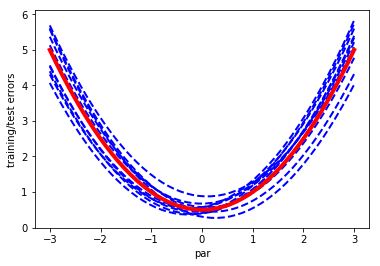

In [27]:
for i in range(10):
    # Generate the data
    z = np.random.normal(size=20)
    # Training error
    trerr = np.mean(np.subtract.outer(z,par)**2/2, axis=0)
    plt.plot(par,trerr,'b--',linewidth=2)

# Plot the graph
plt.xlabel("par")
plt.ylabel("training/test errors")
plt.plot(par, te_err,'r-',linewidth=4) # Plot the test error
plt.show()

# Estimation of test error by cross validation method

In [28]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
n, K = 100, 10                   # Set the number of data to 100 and 10 CV( Cross Validation).
# Data generation
x = np.random.uniform(-2,2,n)    # Uniform distribution on the interval [-2, 2]
y = np.sin(2*np.pi*x)/x + np.random.normal(scale=0.5,size=n)
# Group data into groups 
cv_idx = np.tile(np.arange(K), int(np.ceil(n/K)))[:n]    
maxdepths = np.arange(2,10)      # Set candidates for decision tree depth
cverr = np.array([])
for mp in maxdepths:
    cverr_lambda = np.array([])
    for k in range(K):  
        tr_idx = (cv_idx!=k) 
        te_idx = (cv_idx==k) 
        cvx = x[tr_idx]; cvy = y[tr_idx]   # Split data for CV
        dtreg = DecisionTreeRegressor(max_depth=mp)
        dtreg.fit(np.array([cvx]).T, cvy)               # Estimate by decision tree
        ypred = dtreg.predict(np.array([x[te_idx]]).T)  # Prediction
        # Calculate CV error
        cl = np.append(cverr_lambda, np.mean((y[te_idx]-ypred)**2/2))
    cverr = np.append(cverr, np.mean(cl))

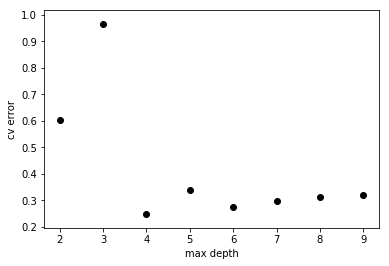

In [30]:
plt.scatter(maxdepths, cverr,c='k')  # Plot cv error
plt.xlabel("max depth"); plt.ylabel('cv error')
plt.show()

# ROC curve and AUC
ROC curve (Receiver Operating Characteristic curve)

AUC (Area Under the Curve)

In [31]:
import numpy as np

In [32]:
n = 100     # データ数 100
xp = np.random.normal(loc=1,size=n*2).reshape(n,2) # 信号アリ
xn = np.random.normal(size=n*2).reshape(n,2)       # 信号ナシ

In [33]:
# F1 のAUC
np.mean(np.subtract.outer(xp[:,0],xn[:,0]) >= 0)   

0.6899

In [34]:
# F2 のAUC
np.mean(np.subtract.outer(np.sum(xp,1),np.sum(xn,1)) >= 0)  

0.815

F2の計算には行列の行和を求める．

    行和は np.sum のaxisオプションを1とすれば計算できる．
    
        np.sum(xp, axis=1)と指定するのが基本だが，np.sum(xp, 1)と書いても良い. 
        
    列和は axisオプションを0とすれば計算できる．
    
        np.sum(xp, axis=0)と指定するのが基本だが，np.sum(xp, 0)と書いても良い. 

コードでは，信号アリ，ナシのデータのすべてのペアについて差をとって，それが0より大きいかどうかを判定している．

すなわち

${\bf{E}}_{X \sim P_{+}, X' \sim P_{-}} [ I [F(X) - F(X') \geq 0 ]]$

と変形して計算する．

この計算には，外積の「掛け算」を「引き算」に変えた np.subtract.outer を用いている．

In [35]:
n = 10000  # データ数 10000
xp = np.random.normal(loc=1,size=n*2).reshape(n,2) # 信号アリ
xn = np.random.normal(size=n*2).reshape(n,2)       # 信号ナシ

In [36]:
# F1 のAUC
np.mean(np.subtract.outer(xp[:,0],xn[:,0]) >= 0)

0.76135429

In [37]:
# F2 のAUC
np.mean(np.subtract.outer(np.sum(xp,1),np.sum(xn,1)) >= 0)

0.83864464

In [38]:
import scipy as sp
from scipy import integrate    # integrateを使う

面積計算には scipy で提供される数値積分のモジュール integrate を用いる．

$F_{1}$と$F_{2}$の分布は

$F_{1} (X) \sim N(0, 1), \ F_{1} (X') \sim N(1, 1)$

$F_{2} (X) \sim N(0, 2), \ F_{2} (X') \sim N(2, 2)$

となり，これらからROC曲線を求めることができる．

In [39]:
# F1のAUC
def fpr(c):
    return(1-sp.stats.norm.cdf(c))
def tpr(c):
    return(1-sp.stats.norm.cdf(c,loc=1))
c = np.arange(-10, 10, 0.01)
sp.integrate.cumtrapz(tpr(c)[::-1],fpr(c)[::-1])[-1]  # F1のAUCの計算

0.7602481081209274

In [40]:
# F2のAUC
def fpr(c):
    return(1-sp.stats.norm.cdf(c,scale=np.sqrt(2))) 
def tpr(c):
    return(1-sp.stats.norm.cdf(c,loc=2,scale=np.sqrt(2)))
sp.integrate.cumtrapz(tpr(c)[::-1],fpr(c)[::-1])[-1]  # F2のAUCの計算

0.8413437378589432

配列 fpr(c) は降順になっているので，昇順にするために fpr(c)[::-1]としている．

それに伴って，tpr(c) の方も順番を逆転させている．

これらの計算から sp.integrate.cumtrapz の返り値として正の積分値が得られる．